# Descriptive Statistics Fundamentals

### Concepts reviewed:
1. Types of data
    - Categorical 
    - Numerical variables
   
2. Measures of central tendency
    - Mean
    - Median
    - Mode
     
3. Measures of dispersion (Variability)
    - Variance
    - Standard deviation
    - coefficient of variation

4. Measures of shape:
    - Skewness

5. Measures of joint variabilities
    - Covariance
    - Correlation
  
6. Data visualization
   

In [ ]:
#  libs required by the notebook:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# load the data and check the dataset "health"
df = pd.read_csv('supermarket-sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [107]:
# usefull cmd to check the 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [113]:
# measures of central tendency
# a good strategy is to make a subset of what I'm interested on analyzing
df_subset = df[['Customer type','Gender','Product line','Unit price','Quantity','Rating']]
df_subset.head()

,Customer type,Gender,Product line,Unit price,Quantity,Rating
0,Member,Female,Health and beauty,74.69,7,9.1
1,Normal,Female,Electronic accessories,15.28,5,9.6
2,Normal,Male,Home and lifestyle,46.33,7,7.4
3,Member,Male,Health and beauty,58.22,8,8.4
4,Normal,Male,Sports and travel,86.31,7,5.3


In [116]:
# we will need to group columns in order to make some sense:
product_line_unit_price = df_subset.groupby('Product line')['Unit price']
product_line_unit_price.head()

0     74.69
1     15.28
2     46.33
3     58.22
4     86.31
5     85.39
6     68.84
7     73.56
8     36.26
9     54.84
10    14.48
11    25.51
12    46.95
13    43.19
14    71.38
15    93.72
16    68.93
17    72.61
18    54.67
19    40.30
22    33.20
24    88.63
25    52.59
26    33.52
27    87.67
28    88.36
30    94.13
31    78.07
34    99.42
49    82.63
Name: Unit price, dtype: float64

In [122]:
# easy peasy to calculate the mean, and median (mode is not straight forward, let's deal with it later)
unit_price_mean = product_line_unit_price.mean()
unit_price_mean

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [123]:
unit_price_median = product_line_unit_price.median()
unit_price_median

Product line
Electronic accessories    51.505
Fashion accessories       55.090
Food and beverages        53.995
Health and beauty         57.405
Home and lifestyle        55.590
Sports and travel         58.650
Name: Unit price, dtype: float64

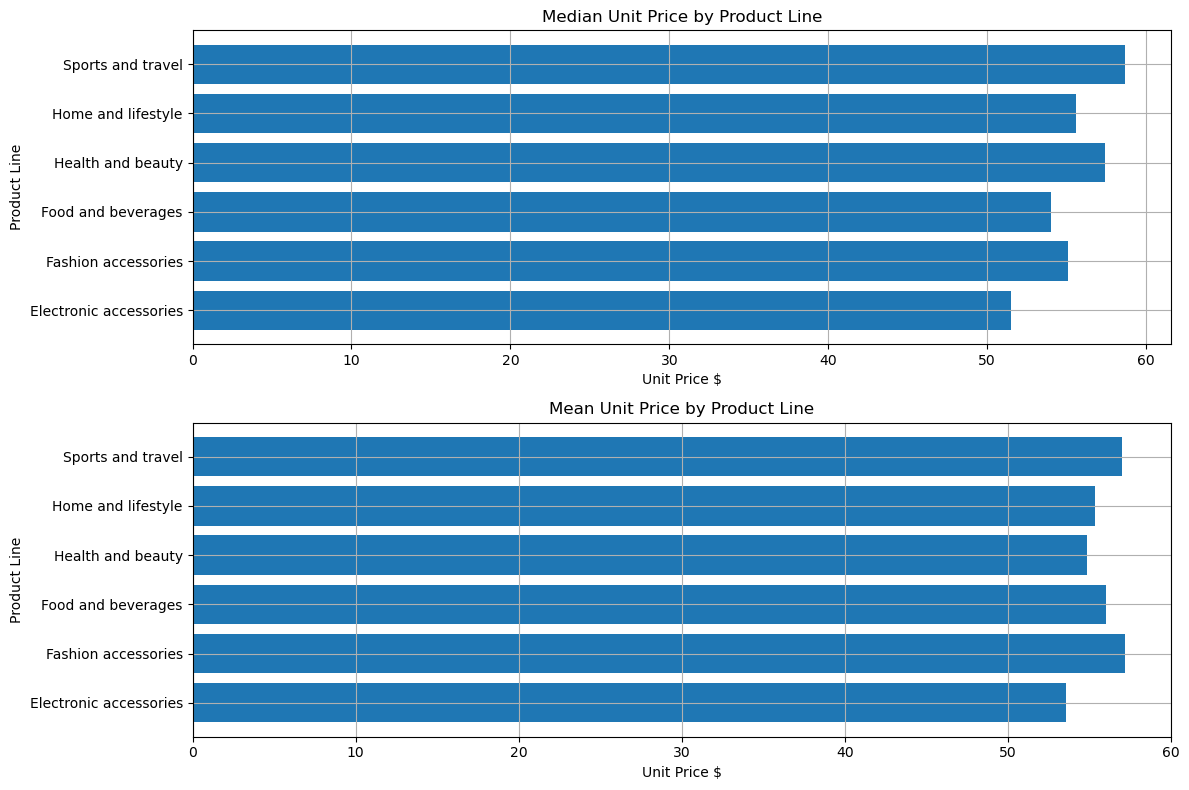

In [155]:
# bar plots to make it an interesting comparison:
fig, axs = plt.subplots(2,1, figsize=(12,8))
axs[0].barh(unit_price_median.index,unit_price_median)
axs[0].set_title('Median Unit Price by Product Line')
axs[0].set_xlabel('Unit Price $')
axs[0].set_ylabel('Product Line')
axs[0].grid(True)

axs[1].barh(unit_price_mean.index,unit_price_mean)
axs[1].set_title('Mean Unit Price by Product Line')
axs[1].set_xlabel('Unit Price $')
axs[1].set_ylabel('Product Line')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [163]:
# lets see the variance and standard distribution for those graphs:
unit_price_var = product_line_unit_price.var()
unit_price_var

Product line
Electronic accessories    715.460958
Fashion accessories       711.091246
Food and beverages        690.125591
Health and beauty         694.483674
Home and lifestyle        686.804923
Sports and travel         723.879822
Name: Unit price, dtype: float64

In [164]:
unit_price_std_dev = product_line_unit_price.std()
unit_price_std_dev

Product line
Electronic accessories    26.748102
Fashion accessories       26.666294
Food and beverages        26.270242
Health and beauty         26.353058
Home and lifestyle        26.206963
Sports and travel         26.905015
Name: Unit price, dtype: float64

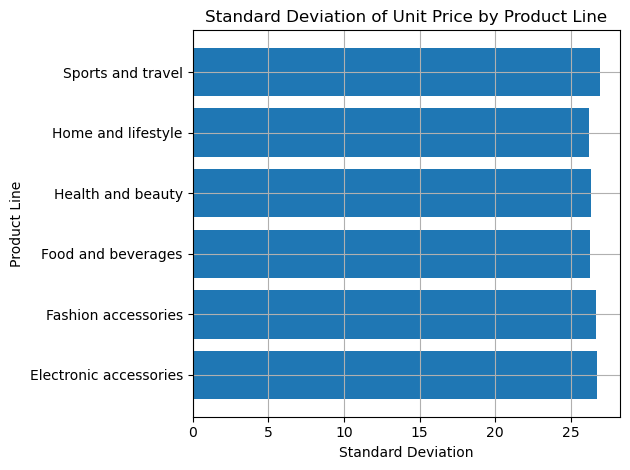

In [165]:
fig, ax = plt.subplots()

ax.barh(unit_price_std_dev.index, unit_price_std_dev)
ax.set_title('Standard Deviation of Unit Price by Product Line')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Product Line')
ax.grid(True)

plt.tight_layout()
plt.show()

In [157]:
# lets see the skew for those graphs:
unit_price_skewness = product_line_unit_price.skew()
unit_price_skewness

Product line
Electronic accessories    0.097860
Fashion accessories       0.009892
Food and beverages        0.059235
Health and beauty        -0.070426
Home and lifestyle       -0.006400
Sports and travel        -0.062278
Name: Unit price, dtype: float64

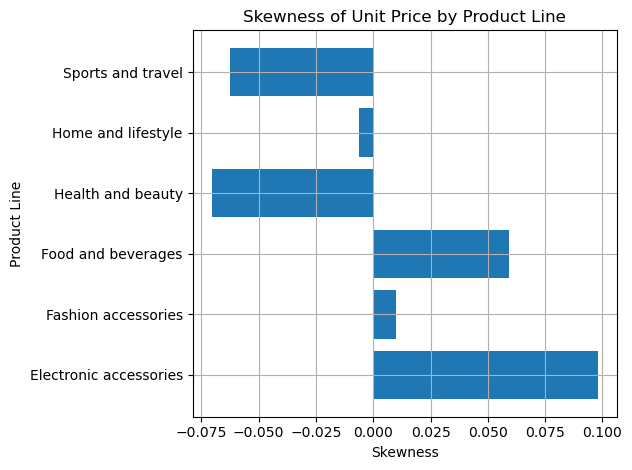

In [161]:
fig, ax = plt.subplots()

ax.barh(unit_price_skewness.index, unit_price_skewness)
ax.set_title('Skewness of Unit Price by Product Line')
ax.set_xlabel('Skewness')
ax.set_ylabel('Product Line')
ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# if skewness > 0 -> positive skew (few high-prices)
# if skewness < 0 -> negative skew (few low-prices)
# if skewness ~= 0 -> balanced